In [ ]:
# pip install wordcloud


In [ ]:
# pip install Pillow

In [43]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from os import path
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 
stopwords.add('will')
import collections

df = pd.read_csv('../../resources/New_sentiment_IG_Category_jc_2021-08-26.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   152 non-null    int64  
 1   Sentence ID  152 non-null    int64  
 2   Dialogue ID  152 non-null    int64  
 3   author       152 non-null    object 
 4   Category     152 non-null    object 
 5   shortcode    152 non-null    object 
 6   timestamp    152 non-null    object 
 7   likes        152 non-null    int64  
 8   comments     152 non-null    int64  
 9   caption      98 non-null     object 
 10  text         151 non-null    object 
 11  Hash_tag2    152 non-null    object 
 12  clean_txt    152 non-null    object 
 13  token_txt    152 non-null    object 
 14  tokenized    152 non-null    object 
 15  neg          152 non-null    float64
 16  neu          152 non-null    float64
 17  pos          152 non-null    float64
 18  compound     152 non-null    float64
dtypes: float

In [23]:
df.head()

,Unnamed: 0,Sentence ID,Dialogue ID,author,Category,shortcode,timestamp,likes,comments,caption,text,Hash_tag2,clean_txt,token_txt,tokenized,neg,neu,pos,compound
0,0,0,0,shmee150,Automotive,CSzoxcyrzj2,8/20/2021 18:48,19080,49,"Photo shared by Tim - Shmee on August 20, 2021...",Back at the wheel of an SF90! With @bannedauto...,"[['Ferrari'], ['SF90'], ['futureshmeemobile'],...",['Back at the wheel of an SF90 With bannedauto...,['Back at the wheel of an SF90 With bannedauto...,"[""['Back"", 'at', 'the', 'wheel', 'of', 'an', '...",0.027,0.801,0.172,0.9379
1,1,1,1,shmee150,Automotive,CSr2jQPjy59,8/17/2021 18:14,22143,100,"Photo shared by Tim - Shmee on August 17, 2021...",It's a P1 kinda day! Out for a drive in @super...,"[['McLaren'], ['P1'], ['McLarenP1'], ['testdri...",['Its a P1 kinda day Out for a drive in superc...,['Its a P1 kinda day Out for a drive in superc...,"[""['Its"", 'a', 'P1', 'kinda', 'day', 'Out', 'f...",0.000,0.934,0.066,0.6351
2,2,2,2,shmee150,Automotive,CSpWzdxJIIV,8/16/2021 18:58,21606,130,"Photo shared by Tim - Shmee on August 16, 2021...",The beautiful 300SL Roadster is without a shad...,"[['Mercedes'], ['300SL'], ['PebbleBeach'], ['C...",['The beautiful 300SL Roadster is without a sh...,['The beautiful 300SL Roadster is without a sh...,"[""['The"", 'beautiful', '300SL', 'Roadster', 'i...",0.040,0.772,0.188,0.8315
3,3,3,3,shmee150,Automotive,CSkdxyJAk2n,8/14/2021 21:23,30069,113,"Photo shared by Tim - Shmee on August 14, 2021...",The breathtaking @bugatti Bolide at @thequaile...,"[['Bugatti'], ['Bolide'], ['Quail'], ['CarWeek...",['The breathtaking bugatti Bolide at thequaile...,['The breathtaking bugatti Bolide at thequaile...,"[""['The"", 'breathtaking', 'bugatti', 'Bolide',...",0.000,0.846,0.154,0.7964
4,4,4,4,shmee150,Automotive,CSfHSEzi3BD,8/12/2021 19:30,34073,140,"Photo shared by Tim - Shmee on August 12, 2021...",The new @astonmartinlagonda Valkyrie Spider ha...,"[['AstonMartin'], ['Valkyrie'], ['ValkyrieSpid...",['The new astonmartinlagonda Valkyrie Spider h...,['The new astonmartinlagonda Valkyrie Spider h...,"[""['The"", 'new', 'astonmartinlagonda', 'Valkyr...",0.000,0.978,0.022,0.1386


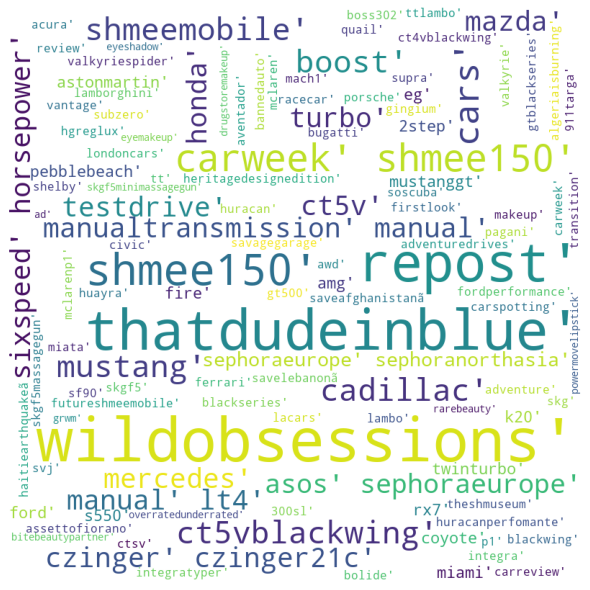

In [30]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.Hash_tag2:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [31]:
print(comment_words)

[['ferrari'], ['sf90'], ['futureshmeemobile'], ['assettofiorano'], ['bannedauto'], ['lacars'], ['shmee150']] [['mclaren'], ['p1'], ['mclarenp1'], ['testdrive'], ['carweek'], ['shmee150']] [['mercedes'], ['300sl'], ['pebblebeach'], ['carweek'], ['testdrive'], ['shmee150']] [['bugatti'], ['bolide'], ['quail'], ['carweek'], ['shmee150']] [['astonmartin'], ['valkyrie'], ['valkyriespider'], ['firstlook'], ['pebblebeach'], ['carweek'], ['shmee150']] [['czinger'], ['czinger21c'], ['carweek'], ['shmee150']] [['czinger'], ['czinger21c'], ['carweek'], ['shmee150']] [['czinger'], ['czinger21c'], ['carweek'], ['shmee150']] [['porsche'], ['911targa'], ['heritagedesignedition'], ['testdrive'], ['hgreglux'], ['miami'], ['shmee150']] [['savagegarage'], ['pagani'], ['huayra'], ['miami'], ['shmee150']] [['shelby'], ['gt500'], ['ford'], ['mustang'], ['shmeemobile'], ['shmee150']] [['mercedes'], ['amg'], ['gtblackseries'], ['shmeemobile'], ['shmee150']] [['mercedes'], ['amg'], ['blackseries'], ['shmeemobi